**# Username: suneelraju160**

### **Name: Kucharlapati Venkata Suneel Raju**

Data Science latest assignments - 16 Aug 2025

Assignment 5: EDA

Date: 04 Dec 2025

### **1.	Data Cleaning and Preparation:**


### ●	Load the dataset into a data frame or equivalent data structure.

### ●	Handle missing values appropriately (e.g., imputation, deletion).

### ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

### ●	Detect and treat outliers if necessary.


In [15]:
# Importing required libraries to perform EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the .csv file and displaying the info

df = pd.read_csv('/content/Cardiotocographic.csv')
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [16]:
# Handling the missing values
df.isnull().sum()


# Fill numeric NaN with mean
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


# Outlier detection (IQR)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    print(col, "Outliers:", ((df[col] < lower) | (df[col] > upper)).sum())


LB Outliers: 10
AC Outliers: 43
FM Outliers: 347
UC Outliers: 13
DL Outliers: 125
DS Outliers: 141
DP Outliers: 305
ASTV Outliers: 10
MSTV Outliers: 80
ALTV Outliers: 318
MLTV Outliers: 81
Width Outliers: 10
Tendency Outliers: 10
NSP Outliers: 580


In [17]:
median = df[col].median()
df[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])


### **2.	Statistical Summary:**


### ●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

### ●	Highlight any interesting findings from this summary.


In [18]:
# Statistical summary of the datafarame after trating outliers
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.0
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.0
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,1.0
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.0
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,1.0


### **3.	Data Visualization:**


### ●	Create histograms or boxplots to visualize the distributions of various numerical variables.

### ●	Use bar charts or pie charts to display the frequency of categories for categorical variables.

### ●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

### ●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.


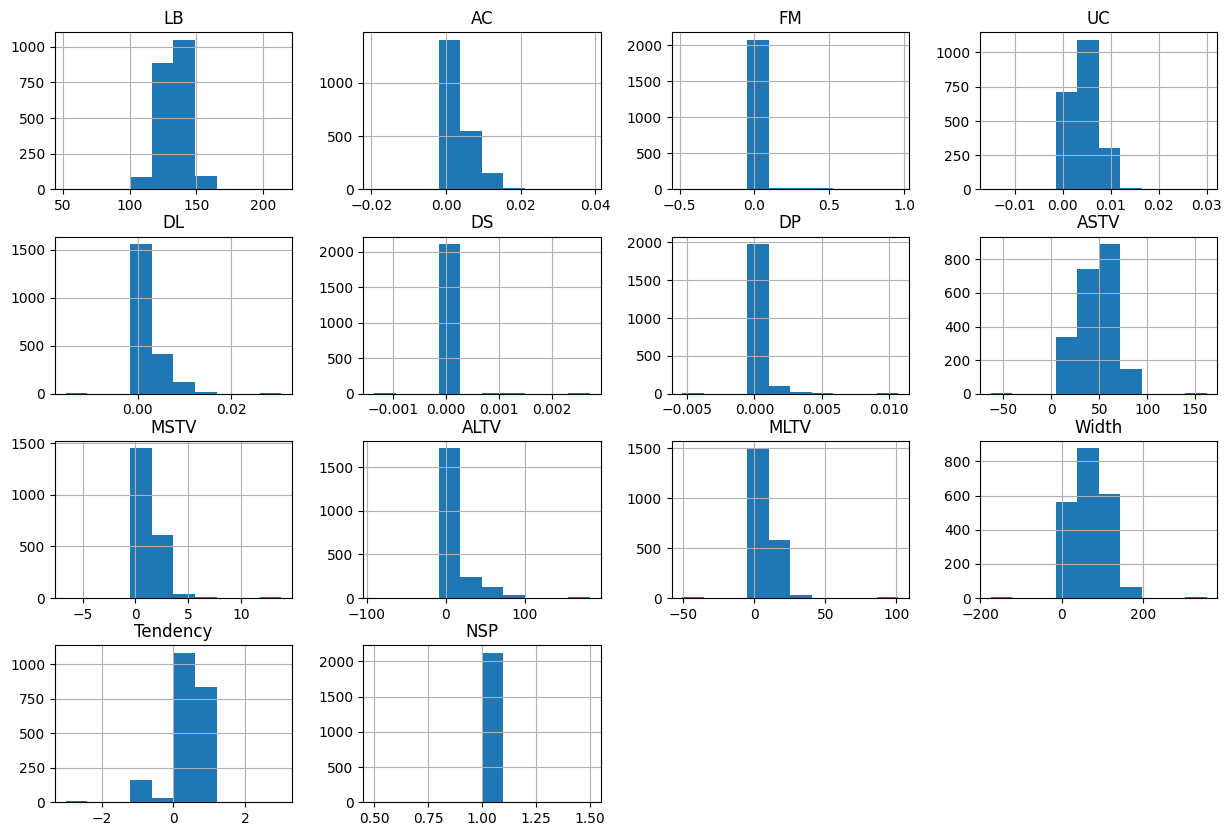

In [19]:
#Histograms to visualize various numerical variables
df[num_cols].hist(figsize=(15,10))
plt.show()


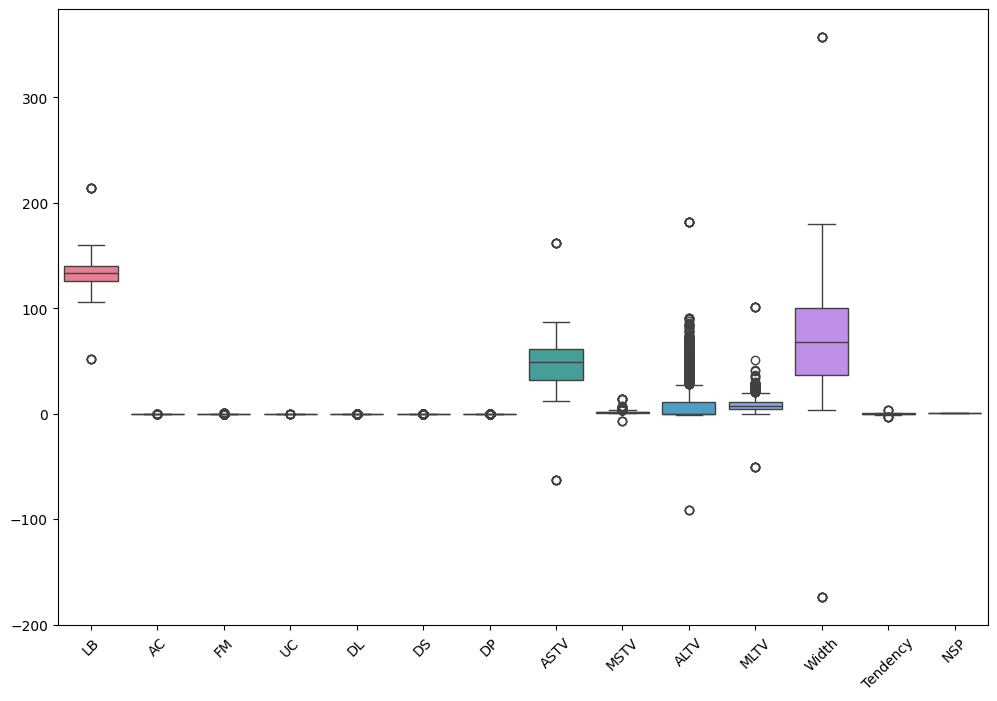

In [20]:
#Display of boxplots
plt.figure(figsize=(12,8))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()


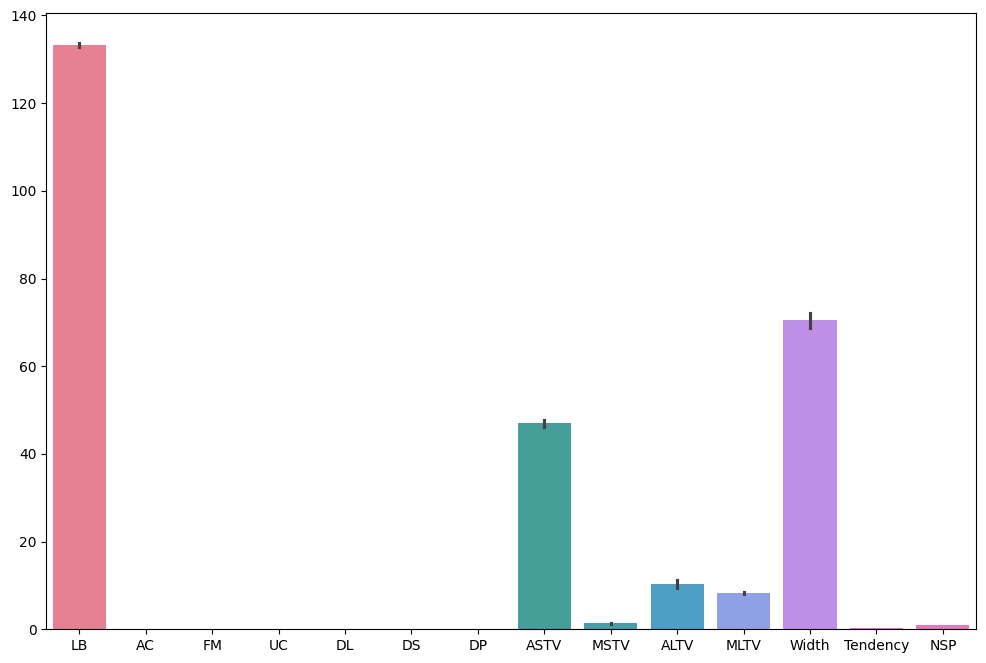

In [21]:
#Bar plot to represent frequencies of various categories of categorial variables
plt.figure(figsize=(12,8))
sns.barplot(data=df)
plt.show()


In [22]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062839,0.018776,-0.166201,-0.126536,-0.005438,-0.047724,0.241857,-0.169561,0.210446,-0.003457,-0.118425,0.236864,NaN
AC,-0.062839,1.000000,0.009432,0.071863,-0.093196,-0.033101,-0.083277,-0.230439,0.133649,-0.271041,-0.104875,0.234735,0.031977,NaN
FM,0.018776,0.009432,1.000000,-0.053226,0.009718,0.029899,0.121274,-0.032691,0.017055,-0.011936,-0.006237,0.097204,-0.018338,NaN
UC,-0.166201,0.071863,-0.053226,1.000000,0.190128,-0.006922,0.070501,-0.181161,0.189406,-0.227304,-0.049351,0.107159,-0.066463,NaN
DL,-0.126536,-0.093196,0.009718,0.190128,1.000000,0.058430,0.144940,-0.069361,0.410102,-0.186967,-0.165198,0.408664,-0.023490,NaN
DS,-0.005438,-0.033101,0.029899,-0.006922,0.058430,1.000000,0.004285,0.008425,0.016077,-0.004392,0.034349,0.040832,-0.015398,NaN
DP,-0.047724,-0.083277,0.121274,0.070501,0.144940,0.004285,1.000000,0.038117,0.119250,-0.077654,-0.114084,0.175340,-0.130395,NaN
ASTV,0.241857,-0.230439,-0.032691,-0.181161,-0.069361,0.008425,0.038117,1.000000,-0.293882,0.357497,-0.219728,-0.206942,-0.010892,NaN
MSTV,-0.169561,0.133649,0.017055,0.189406,0.410102,0.016077,0.119250,-0.293882,1.000000,-0.291935,0.028779,0.433064,-0.036660,NaN
ALTV,0.210446,-0.271041,-0.011936,-0.227304,-0.186967,-0.004392,-0.077654,0.357497,-0.291935,1.000000,-0.107568,-0.345997,0.036722,NaN


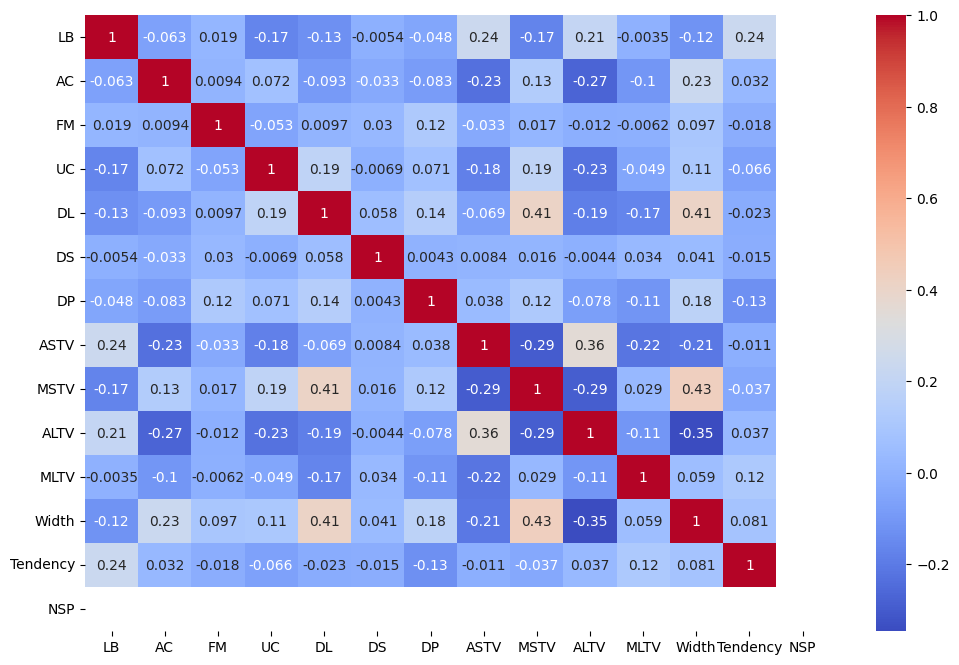

In [23]:
#corerlation and display of it using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


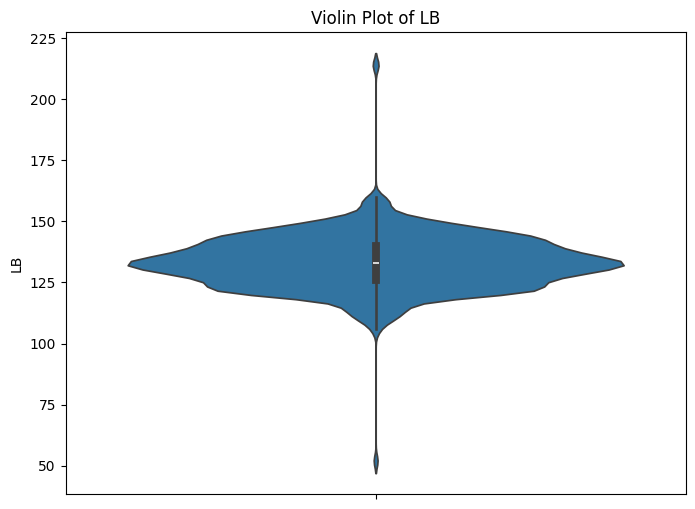

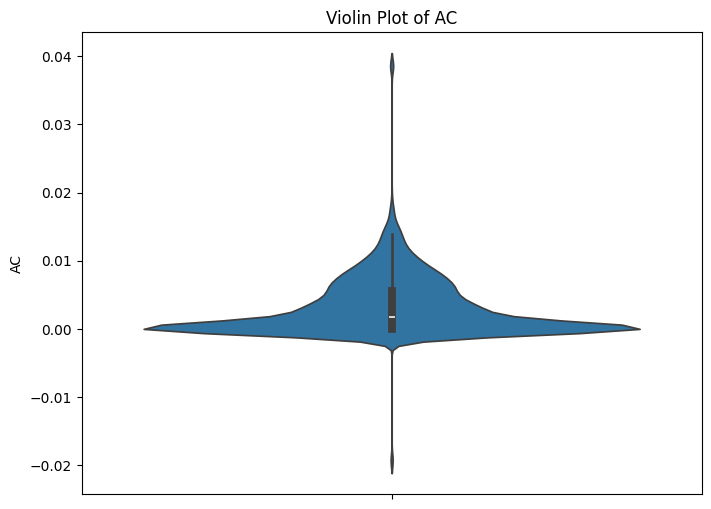

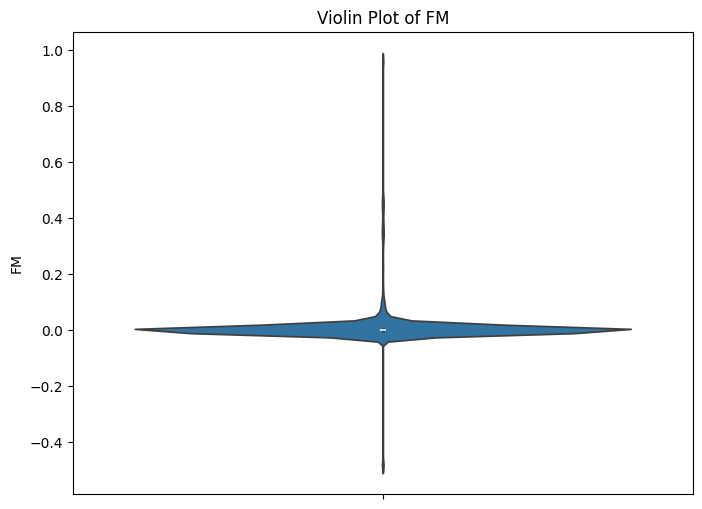

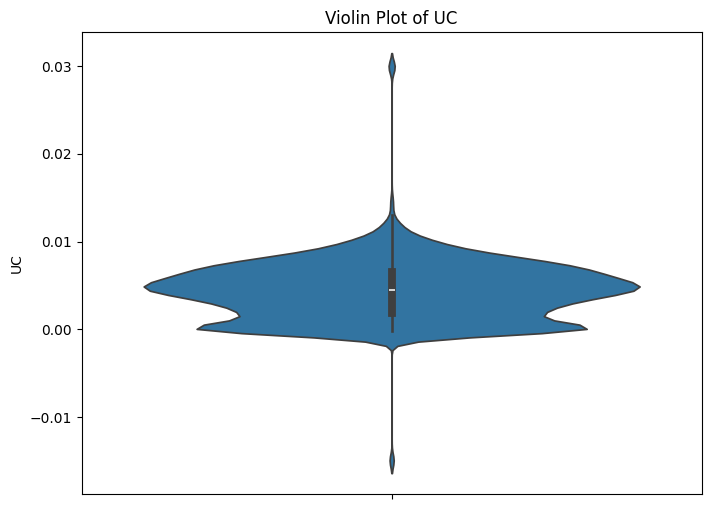

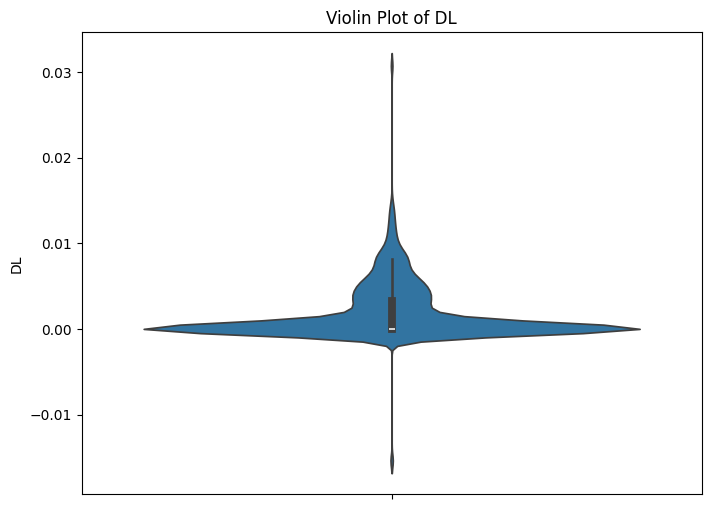

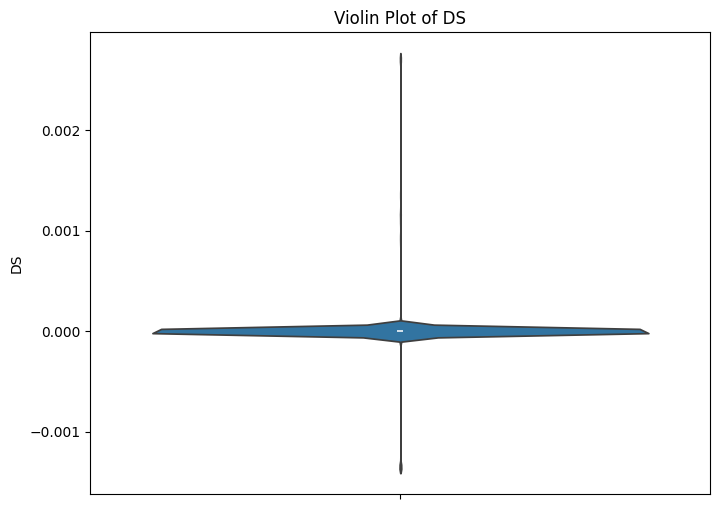

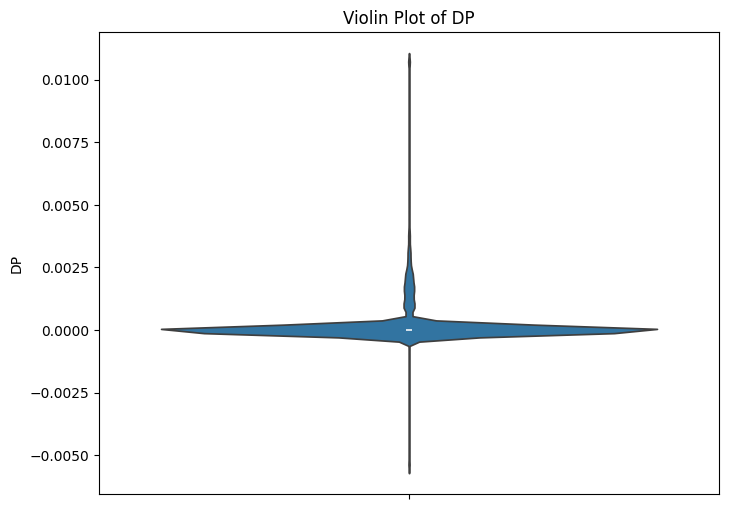

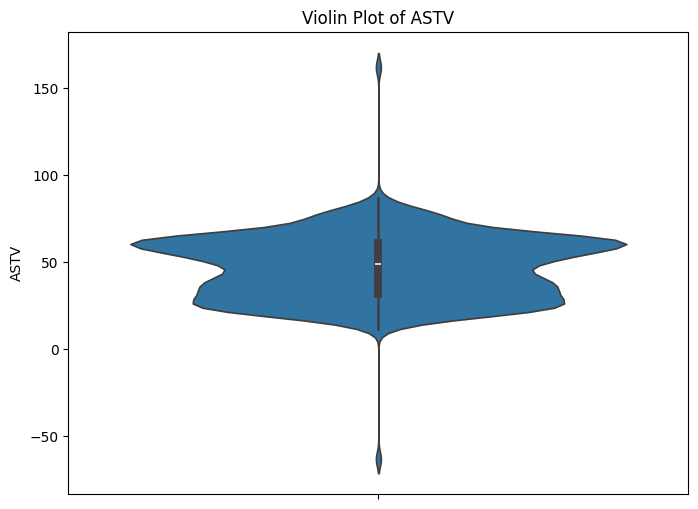

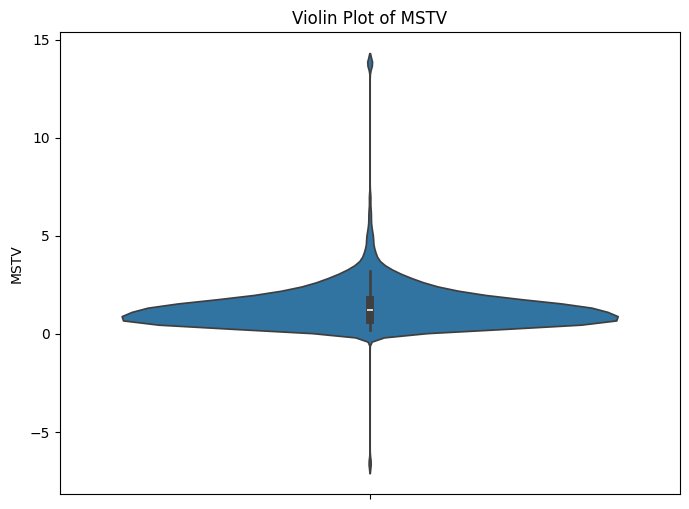

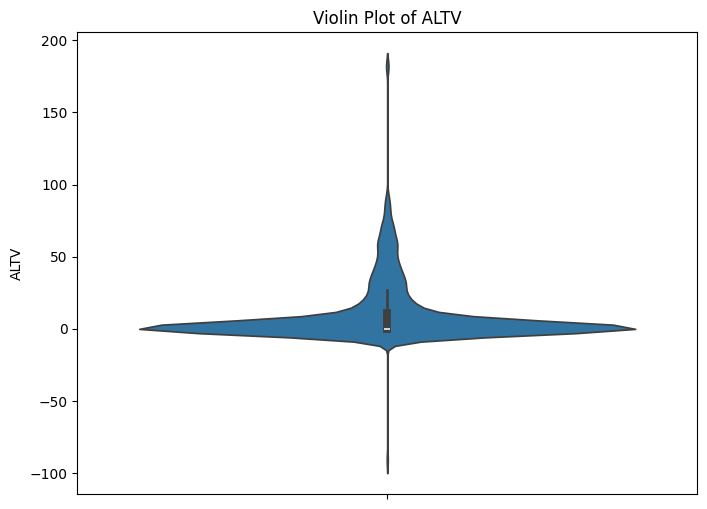

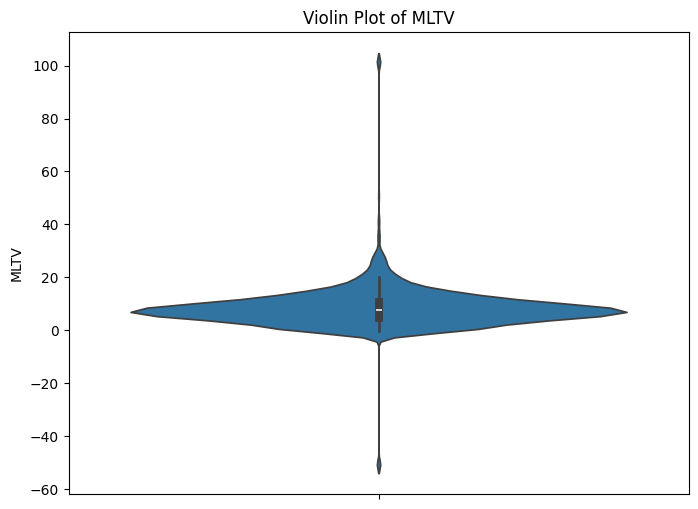

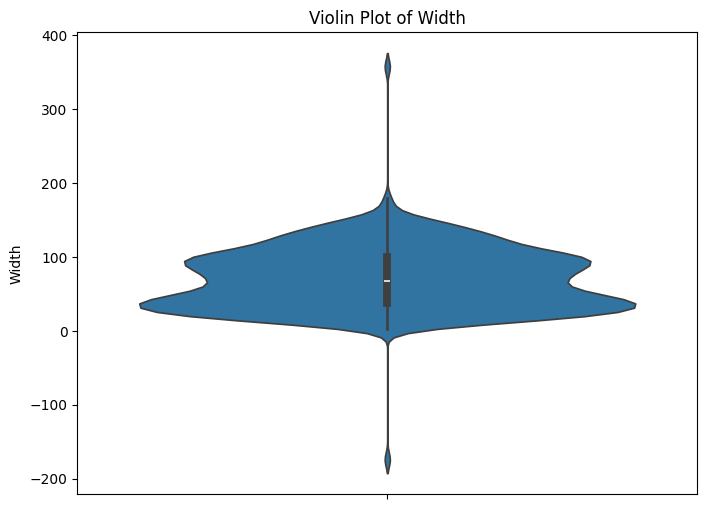

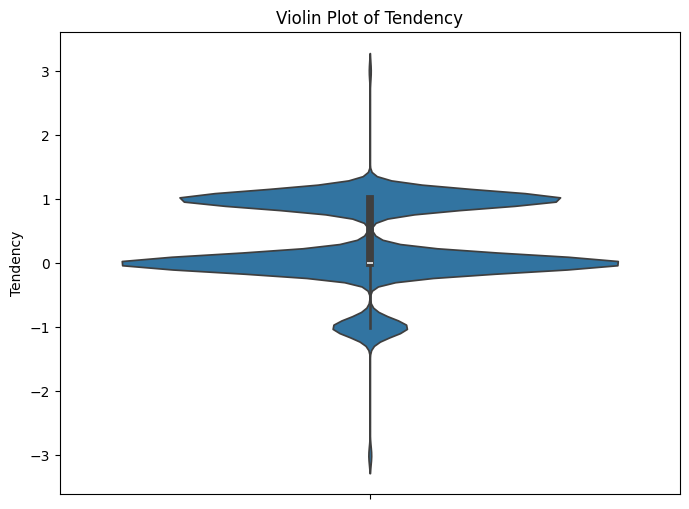

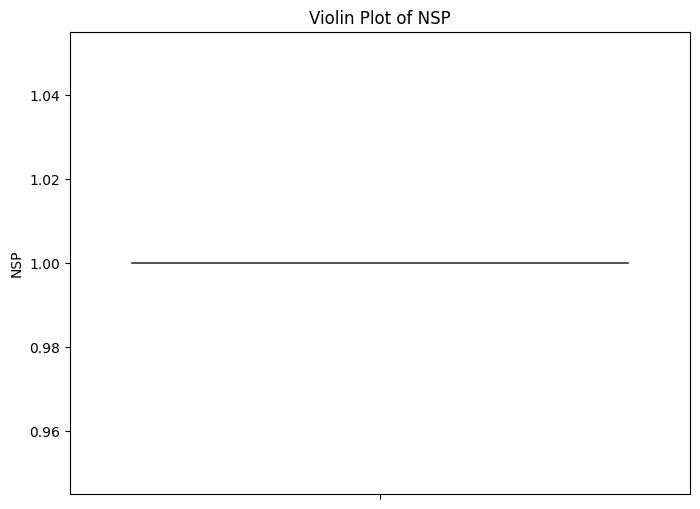

In [24]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(y=df[col])
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)
    plt.show()

SUMMARY:

  Performing EDA on the Cardiotocographic dataset had begun by impoting pandas, NumPy, Matplotlib and Seaborn libraries. These libraries are used for working for numerical and statistical data along with their visualizations. The data consists of entire float datatype with 2126 rows and 14 columns.

  'df.isnull().sum()' is used to identify the missing values and they were filled with mean. Replacing the NaN values with mean helps in reducing deviations of the statistical values. Many outliers were detected in each category and are removed.

  'df.describe()' is used to describe the statistical summary of the dataset. Parameters like mean, mediam, mode, standard deviation, min and max values, 25th percentile, 50th percentile and 75th percentile are displayed for each category.

  The histograms and boxplots for representation of numerical variables with respect to frequencies are plotted for every column in the dataset. The presence of outliers can be seen clearly.

  Although the barplot is plooted, the dataset doesnot contain any categorial variables.

  The heatmap displays the correlation among the category columns. It can be seen than there is very weak correlation in pairs of LB-AC, AC-FM, FM-UC, DS-AC, LB-UO with correlation less than 0.1 or more than -0.1.

  Variables such as DL-WIDHT, DL-MSTV, MSTV-WIDTH, LB-ASTV, AC-WIDTH, TENDANCY-LB are in posetive correlation. It means as one variable increases, other also increases and vice-versa. Whereas other variable pairs show negative correlations.

  The violin plot displays the dendity of variables present in a range of frequencies. It shows the where the variables are in the certain range of frequencies and their density. It helps to provide deeper insights. The narrowness represents the less density of variables whereas wideness shows more density.